## Principal Component Analysis for TPM x Coeff data
### Authors: D. Tolosa, P. Joshi, R. Banda, B. Ziemann

In this notebook we conduct Principal Component(PC) Analysis on the TPM*Coeff data

This analysis will provide 4 outputs: <br>
Output 1. Scree Plot showing percentage of explained variance for each principle component <br>
Output 2. Scatter plot of PC1 vs PC2 for all the subjects <br>
Output 3. Loading scores of the genes in different PCs <br>
Output 4. CSV file of PC values for each subject <br>

**_This project was developed at The Data Mine, Purdue University, in partnership with Molecular Stethoscope._**

In [1]:
# reading the data and implementing the dependencies.
import pandas as pd
import numpy as np

myDF = pd.read_excel(
    "/anvil/projects/tdm/corporate/molecular-stethoscope/data-s23/ClusterMarkers_1819ADcohort.congregated_DR.xlsx",
    sheet_name=1,
)
myDF2 = pd.read_excel(
    "/anvil/projects/tdm/corporate/molecular-stethoscope/data-s23/ClusterMarkers_1819ADcohort.congregated_DR.xlsx",
    sheet_name=0,
)

In [2]:
# Uncomment a line below for exploring the data accordingly
# myDF.describe()
# myDF.shape
# myDF.head()
# myDF2.describe()
# myDF2.shape
# myDF2.columns
# myDF2.head()

In [3]:
# myDF.head()

In [4]:
# all_columns = list(myDF.columns)
# non_subject_columns = ['gene_id','Description','ORI','MIN','MAX','AVG']

# coeff_columns = [i for i in all_columns if i not in non_subject_columns]

In [2]:
# implementing dependencies for PCA analysis.
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## PCA for all subjects without disease identifiaction

#### Step 1: data prep ----------------

In [4]:
myDF_nonERCC = myDF[~myDF.loc[:, "Coeff"].isnull()]
subjects_df = myDF[~myDF.loc[:, "Coeff"].isnull()]  # discarding the ERCC rows
gene_columns = list(subjects_df["gene_id"])  # storing gene ids in a list.
subjects_columns = list(
    subjects_df.filter(regex="1$").columns
)  # filtering out subject ids' first replicate in a list
subjects_df = subjects_df[
    subjects_columns
]  # creating a dataframe with only first replicates of the subjects
print(subjects_df.shape)
# subjects_df.head()

(967, 243)


In [5]:
# Multiplying coeff to TPM values
subjects_df = subjects_df[list(subjects_df.columns)].multiply(
    myDF_nonERCC["Coeff"], axis="index"
)

In [8]:
# print(subjects_df.shape)
# subjects_df.head()

(967, 243)


,11174-r1,11178-r1,11182-r1,11186-r1,11190-r1,11194-r1,11198-r1,11202-r1,11206-r1,11210-r1,...,5666-r1,5668-r1,5669-r1,5672-r1,5673-r1,5683-r1,5702-r1,5706-r1,5767-r1,5784-r1
0,16.045417,17.265022,40.793993,23.944279,28.761446,27.166973,14.552245,9.207112,17.080432,129.733761,...,2.892733,11.960326,4.804862,4.877493,5.858813,17.200821,119.718390,5.446556,4.941455,4.288225
1,1.737725,3.126584,2.540808,4.148845,2.019379,3.493197,3.383245,4.949056,4.270902,3.774239,...,3.408006,3.361870,4.132628,4.023743,4.592994,3.645697,2.779659,3.529128,6.392740,4.264913
2,32.743499,18.705735,37.586015,11.492390,10.519198,25.501970,10.434856,48.367938,55.168132,22.846192,...,7.845792,11.623585,10.172423,14.831919,13.537749,18.452247,11.820159,19.158284,19.906824,20.824801
3,13.881747,2.689632,6.179494,2.965272,3.095587,4.141636,3.308848,13.541306,16.530572,4.968934,...,2.159013,0.755800,4.056630,3.084563,2.382973,1.460136,1.210988,4.940136,3.914692,4.900093
4,1.147448,0.755341,3.266103,2.390238,1.766683,2.692960,3.720901,3.067890,5.582604,1.436982,...,3.153219,0.570044,1.057977,0.000000,0.756330,2.172047,0.000000,1.573556,0.242784,1.222317


In [6]:
subject_id = list(
    subjects_df.columns.str.split("-").str[0]
)  # getting rid of 'r1' from subject ids
subjects_df.columns = subject_id
# subjects_df.head()

In [7]:
# subjects_df= subjects_df.reset_index()
# subjects_df.head(5)
subjects_df = subjects_df.T  # transposing the dataframe

subjects_df.columns = gene_columns  # changing the column names from index to gene id

print(subjects_df.shape)
subjects_df.head(5)
# print(subjects_df.columns)

(243, 967)


,ENSG00000079482.12,ENSG00000169021.5,ENSG00000204160.11,ENSG00000106780.8,ENSG00000113303.11,ENSG00000163162.8,ENSG00000121716.18,ENSG00000064547.13,ENSG00000133816.13,ENSG00000161905.12,...,ENSG00000165795.21,ENSG00000174500.12,ENSG00000156374.14,ENSG00000180891.12,ENSG00000186446.11,ENSG00000105327.15,ENSG00000044115.20,ENSG00000065978.17,ENSG00000157734.13,ENSG00000116688.16
11174,16.045417,1.737725,32.743499,13.881747,1.147448,19.957875,1.692257,0.949756,36.600809,12.775971,...,-10.447114,-0.249718,-0.000000,-5.094655,-0.906364,-3.029062,-20.812522,-177.521891,-0.747433,-15.442627
11178,17.265022,3.126584,18.705735,2.689632,0.755341,12.425032,1.924404,5.661341,24.972457,6.216046,...,-5.611433,-4.536702,-1.008343,-4.362618,-1.300484,-3.819413,-23.484759,-310.347687,-2.657932,-31.057732
11182,40.793993,2.540808,37.586015,6.179494,3.266103,11.971117,2.411579,1.428127,14.527438,0.715067,...,-4.752402,-2.076422,-0.143050,-3.044127,-0.213780,-4.845755,-39.298430,-259.765681,-5.278262,-57.140790
11186,23.944279,4.148845,11.492390,2.965272,2.390238,5.255630,7.120754,1.970973,25.779758,5.380449,...,-10.239787,-3.124469,-1.286506,-0.000000,-0.310348,-3.014678,-26.593882,-277.686686,-2.390076,-33.460610
11190,28.761446,2.019379,10.519198,3.095587,1.766683,4.874452,1.197483,0.512565,24.087481,0.725791,...,-7.911017,-0.435888,-0.820357,-2.759003,-0.147241,-5.518939,-19.952759,-369.356884,-4.753674,-27.336684


#### Step 2: transforming the dataframe into a standardized feature arrays for PCA analysis------

In [11]:
# It standardizes features by subtracting the mean value from the feature and then dividing the result by feature standard deviation.
scaled_data = StandardScaler().fit_transform(subjects_df)
scaled_data[:5]
# len(scaled_data)

array([[-0.21439867, -1.5329588 ,  0.26484167, ...,  1.69667497,
         1.34750948,  1.30896417],
       [-0.1809996 , -0.58941903, -0.20141494, ...,  0.2955222 ,
         0.56232364,  0.21472226],
       [ 0.46334522, -0.98737379,  0.42568316, ...,  0.82910167,
        -0.51459153, -1.61307042],
       [ 0.00191299,  0.10506727, -0.44100222, ...,  0.64005656,
         0.67240861,  0.04633853],
       [ 0.13383189, -1.34161358, -0.47332625, ..., -0.32695402,
        -0.29899411,  0.47547791]])

#### Step 3:  PCA analysis for the data------

In [12]:
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

In [59]:
per_var = np.round(
    pca.explained_variance_ratio_ * 100, decimals=1
)  # storing percent variation for each priciple component

array([14.5,  8.8,  7.5,  4.9,  3.7,  1.8,  1.6,  1.4,  1.3,  1.3,  1.1])

#### Step 4: Plotting the PCA components----- 

Text(0.5, 1.0, 'Scree Plot')

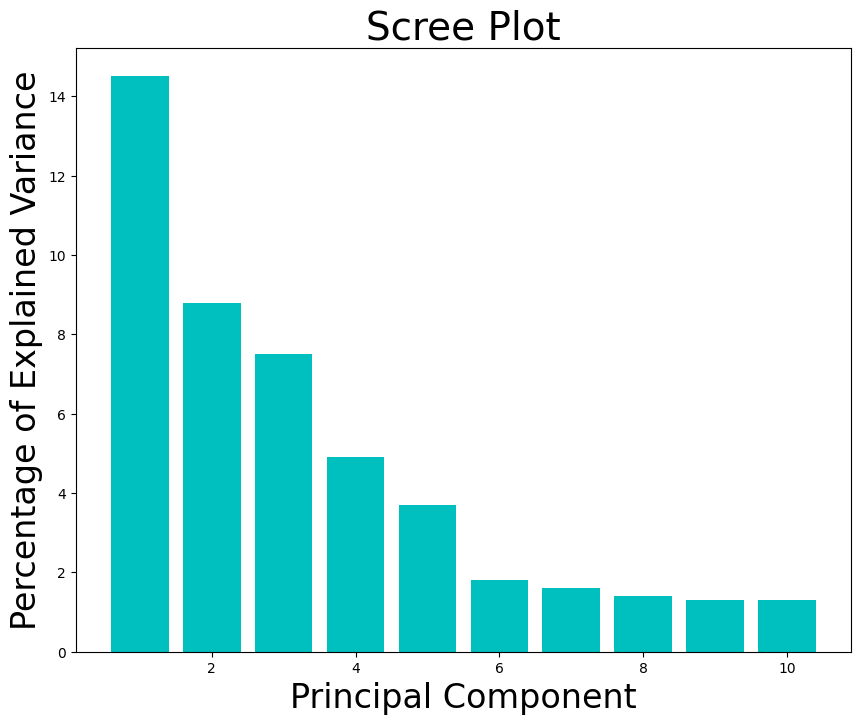

In [69]:
labels = ["PC" + str(X) for X in range(1, len(per_var[0:10]) + 1)]
from matplotlib.pyplot import figure  # Scree plot for priciple components

figure(figsize=(10, 8), dpi=100)
plt.bar(x=range(1, len(per_var[0:10]) + 1), height=per_var[0:10], color="c")
plt.ylabel("Percentage of Explained Variance", fontsize=24)
plt.xlabel("Principal Component", fontsize=24)
plt.title("Scree Plot", fontsize=28)
# plt.show()
# plt.savefig('Scree_plot.png')

Text(0, 0.5, 'PC2 - 8.8%')

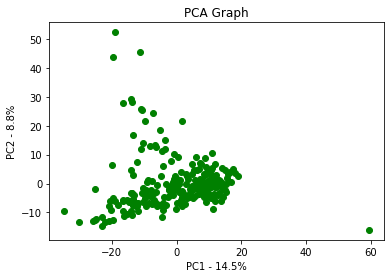

In [14]:
pca_df = pd.DataFrame(
    pca_data, index=[subjects_columns], columns=labels
)  # creating a data frame for PCA values in columns with respect to each subject as an index
plt.scatter(
    pca_df.PC1, pca_df.PC2, color=c
)  # creating a scatter plot of PCA1 and PCA2 values for each subject as a dots.
plt.title("PCA Graph")
plt.xlabel("PC1 - {0}%".format(per_var[0]))
plt.ylabel("PC2 - {0}%".format(per_var[1]))
# pca_df.head()

In [15]:
# for sample in pca_df.index:
# plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))

In [16]:
loading_scores = pd.Series(
    pca.components_[0], index=gene_columns
)  # storing loading values for genes for PCA1
sorted_loading_scores = loading_scores.abs().sort_values(
    ascending=False
)  # sorting the genes on the basis of their loading scores.
top_10_genes = sorted_loading_scores[0:10].index.values
print(loading_scores[top_10_genes])

ENSG00000143363.15   -0.069520
ENSG00000110934.10   -0.066180
ENSG00000100504.16   -0.065778
ENSG00000101290.13   -0.064095
ENSG00000117586.10   -0.063076
ENSG00000182732.16   -0.061645
ENSG00000166091.19   -0.061618
ENSG00000198589.10    0.061066
ENSG00000164096.12   -0.060912
ENSG00000197415.11   -0.060791
dtype: float64


#### 3D plot: to plot subjects in 3 PCs

In [17]:
# Use this code to draw a 3D plot of PCs
# from mpl_toolkits import mplot3d
# %matplotlib inline
# fig = plt.figure()
# ax = plt.axes(projection='3d')
# plt.scatter(pca_df.PC1, pca_df.PC2, pca_df.PC3)
# zdata = ('PC3 - {0}%'.format(per_var[2]))
# xdata = ('PC1 - {0}%'.format(per_var[0]))
# ydata = ('PC2 - {0}%'.format(per_var[1]))

## PCA for subjects using their diagnosis as AD and NCI using myDF2

In [9]:
subjects_df_2 = subjects_df.reset_index()  # resetting the index of the dataframe
# subjects_df

In [10]:
subjects_df_2 = subjects_df_2.rename(
    columns={"index": "subject"}
)  # changing the column name "index" to "subject"
# subjects_df_2.head()

,subject,ENSG00000079482.12,ENSG00000169021.5,ENSG00000204160.11,ENSG00000106780.8,ENSG00000113303.11,ENSG00000163162.8,ENSG00000121716.18,ENSG00000064547.13,ENSG00000133816.13,...,ENSG00000165795.21,ENSG00000174500.12,ENSG00000156374.14,ENSG00000180891.12,ENSG00000186446.11,ENSG00000105327.15,ENSG00000044115.20,ENSG00000065978.17,ENSG00000157734.13,ENSG00000116688.16
0,11174,16.045417,1.737725,32.743499,13.881747,1.147448,19.957875,1.692257,0.949756,36.600809,...,-10.447114,-0.249718,-0.000000,-5.094655,-0.906364,-3.029062,-20.812522,-177.521891,-0.747433,-15.442627
1,11178,17.265022,3.126584,18.705735,2.689632,0.755341,12.425032,1.924404,5.661341,24.972457,...,-5.611433,-4.536702,-1.008343,-4.362618,-1.300484,-3.819413,-23.484759,-310.347687,-2.657932,-31.057732
2,11182,40.793993,2.540808,37.586015,6.179494,3.266103,11.971117,2.411579,1.428127,14.527438,...,-4.752402,-2.076422,-0.143050,-3.044127,-0.213780,-4.845755,-39.298430,-259.765681,-5.278262,-57.140790
3,11186,23.944279,4.148845,11.492390,2.965272,2.390238,5.255630,7.120754,1.970973,25.779758,...,-10.239787,-3.124469,-1.286506,-0.000000,-0.310348,-3.014678,-26.593882,-277.686686,-2.390076,-33.460610
4,11190,28.761446,2.019379,10.519198,3.095587,1.766683,4.874452,1.197483,0.512565,24.087481,...,-7.911017,-0.435888,-0.820357,-2.759003,-0.147241,-5.518939,-19.952759,-369.356884,-4.753674,-27.336684


#### Step 1: data prep, run the cells at the top markes as Step 1: data prep. After that, run the cells below.
#### Step 2: indicating subjects as ad and NCI for PCA analysis----

In [11]:
subjects_df_2[["subject"]] = subjects_df_2[["subject"]].apply(
    pd.to_numeric
)  # changing the subject column from pandas dataframe to numeric data type
merge_df = pd.merge(
    myDF2, subjects_df_2, left_on="Isolate ID", right_on="subject"
)  # merging the dataframe myDF2 with subjects_df2 to add disease column corresponding to each subject.
merge_df.head()
# merge_df.shape

,Isolate ID,Disease,subject,ENSG00000079482.12,ENSG00000169021.5,ENSG00000204160.11,ENSG00000106780.8,ENSG00000113303.11,ENSG00000163162.8,ENSG00000121716.18,...,ENSG00000165795.21,ENSG00000174500.12,ENSG00000156374.14,ENSG00000180891.12,ENSG00000186446.11,ENSG00000105327.15,ENSG00000044115.20,ENSG00000065978.17,ENSG00000157734.13,ENSG00000116688.16
0,1817.0,NCI,1817,5.570252,6.603001,8.247765,3.420295,0.000000,8.440198,0.416987,...,-12.955209,-0.412745,-0.469029,-10.434464,-1.289766,-2.822386,-12.778826,-417.028156,-0.734655,-24.885205
1,1818.0,NCI,1818,12.013696,4.601024,12.595474,5.049361,0.142774,3.598892,0.635247,...,-11.992871,-4.226945,-1.517021,-2.908426,-0.616383,-5.338936,-18.345483,-357.740763,-4.183338,-42.478327
2,1821.0,NCI,1821,5.970695,5.937045,7.463993,2.210076,0.000000,2.976333,1.849025,...,-12.577633,-3.986131,-2.010492,-2.840653,-0.600804,-5.350641,-18.618383,-335.166105,-2.588302,-27.128476
3,1850.0,NCI,1850,5.591943,3.286022,24.563880,0.868828,1.432674,5.006671,5.618370,...,-17.131308,-2.610444,-0.000000,-3.157946,-0.204226,-10.492150,-25.450396,-420.776672,-9.399795,-31.150224
4,1854.0,NCI,1854,4.868791,5.451738,10.767199,3.859024,1.965857,3.015164,1.036224,...,-11.180728,-2.261803,-1.033591,-3.598015,-1.239890,-2.792528,-32.158016,-427.501139,-5.230240,-30.467762


In [12]:
merge_df = merge_df.set_index(
    ["Isolate ID", "Disease", "subject"]
)  # setting indexes on these columns
merge_df.head()

,,,ENSG00000079482.12,ENSG00000169021.5,ENSG00000204160.11,ENSG00000106780.8,ENSG00000113303.11,ENSG00000163162.8,ENSG00000121716.18,ENSG00000064547.13,ENSG00000133816.13,ENSG00000161905.12,...,ENSG00000165795.21,ENSG00000174500.12,ENSG00000156374.14,ENSG00000180891.12,ENSG00000186446.11,ENSG00000105327.15,ENSG00000044115.20,ENSG00000065978.17,ENSG00000157734.13,ENSG00000116688.16
Isolate ID,Disease,subject,,,,,,,,,,,,,,,,,,,,,
1817.0,NCI,1817,5.570252,6.603001,8.247765,3.420295,0.000000,8.440198,0.416987,3.383940,37.735174,1.294591,...,-12.955209,-0.412745,-0.469029,-10.434464,-1.289766,-2.822386,-12.778826,-417.028156,-0.734655,-24.885205
1818.0,NCI,1818,12.013696,4.601024,12.595474,5.049361,0.142774,3.598892,0.635247,0.652595,19.852477,3.318519,...,-11.992871,-4.226945,-1.517021,-2.908426,-0.616383,-5.338936,-18.345483,-357.740763,-4.183338,-42.478327
1821.0,NCI,1821,5.970695,5.937045,7.463993,2.210076,0.000000,2.976333,1.849025,0.133395,14.952803,0.517067,...,-12.577633,-3.986131,-2.010492,-2.840653,-0.600804,-5.350641,-18.618383,-335.166105,-2.588302,-27.128476
1850.0,NCI,1850,5.591943,3.286022,24.563880,0.868828,1.432674,5.006671,5.618370,0.000000,32.509308,4.289381,...,-17.131308,-2.610444,-0.000000,-3.157946,-0.204226,-10.492150,-25.450396,-420.776672,-9.399795,-31.150224
1854.0,NCI,1854,4.868791,5.451738,10.767199,3.859024,1.965857,3.015164,1.036224,2.528238,12.361357,2.768904,...,-11.180728,-2.261803,-1.033591,-3.598015,-1.239890,-2.792528,-32.158016,-427.501139,-5.230240,-30.467762


#### Step 3: transforming the dataframe into a standardized feature arrays for PCA analysis------

In [13]:
scaled_data_all = StandardScaler().fit_transform(merge_df)
# scaled_data_all[:5]
# scaled_data_NCI.shape

#### Step 4: PCA analysis for the diagnosed data

In [15]:
pca_all = PCA()
pca_all.fit(scaled_data_all)
pca_data_all = pca_all.transform(scaled_data_all)
pca_data_all.shape
per_var_all = np.round(pca_all.explained_variance_ratio_ * 100, decimals=1)

#### Step 5: Plotting the PCA components----

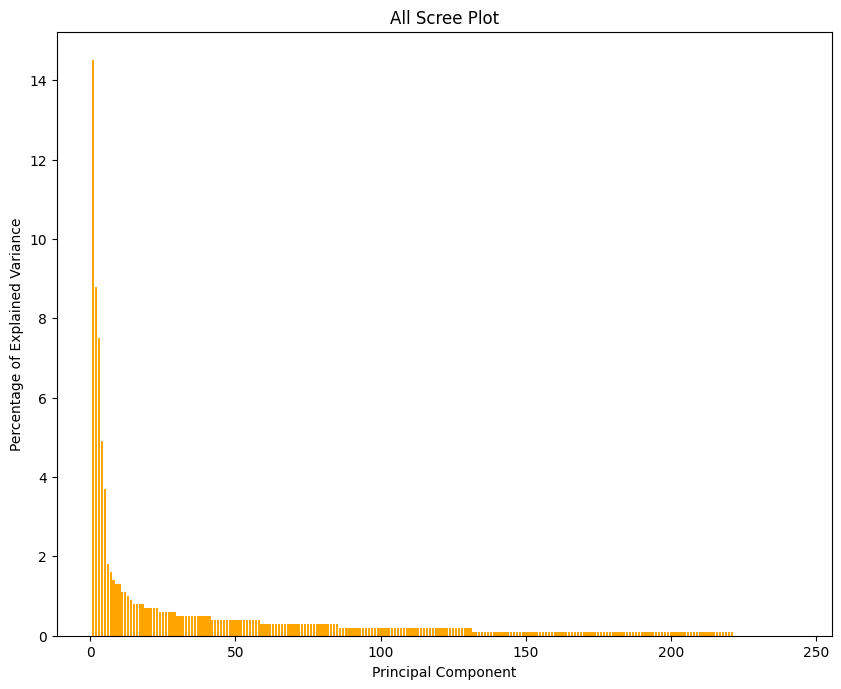

In [16]:
labels = ["PC" + str(X) for X in range(1, len(per_var_all) + 1)]
from matplotlib.pyplot import figure

o = "orange"
figure(figsize=(10, 8), dpi=100)
plt.bar(x=range(1, len(per_var_all) + 1), height=per_var_all, color=o)
plt.ylabel("Percentage of Explained Variance")
plt.xlabel("Principal Component")
plt.title("All Scree Plot")
plt.show()
# print(len(per_var_all))

In [20]:
loading_scores_all = pd.Series(
    pca_all.components_[0], index=gene_columns
)  # storing loading values for genes for PCA1
sorted_loading_scores_all = loading_scores_all.abs().sort_values(
    ascending=False
)  # sorting the genes on the basis of their loading scores.
top_10_genes = sorted_loading_scores_all[0:10].index.values
print(loading_scores_all[top_10_genes])

ENSG00000143363.15   -0.069520
ENSG00000110934.10   -0.066180
ENSG00000100504.16   -0.065778
ENSG00000101290.13   -0.064095
ENSG00000117586.10   -0.063076
ENSG00000182732.16   -0.061645
ENSG00000166091.19   -0.061618
ENSG00000198589.10    0.061066
ENSG00000164096.12   -0.060912
ENSG00000197415.11   -0.060791
dtype: float64


In [17]:
pca_df_all = pd.DataFrame(pca_data_all, index=[subject_id], columns=labels)
pca_df_all = pca_df_all.reset_index().rename(
    columns={"level_0": "subject"}
)  # resetting the index from subject id and chanfing subject column name from "level_0" to "subject"

pca_df_all[["subject"]] = pca_df_all[["subject"]].apply(pd.to_numeric)
hue_df = pd.merge(
    myDF2, pca_df_all, left_on="Isolate ID", right_on="subject"
)  # creating a dataframe with disease column and PCA values for each subject
hue_df = hue_df.set_index(
    ["Isolate ID", "Disease", "subject"]
)  # setting these columns as indexes
hue_df.head()

# hue_df.to_csv('PCA_analysis.csv') # saving the csv file for PC values for each subject.

[None]

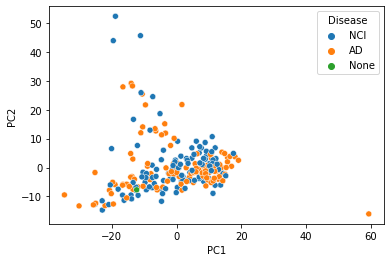

In [18]:
# scatter plot for PC1 and PC2 with hues for AD and NCI

import seaborn as sns

g = sns.scatterplot(x=hue_df.PC1, y=hue_df.PC2, hue="Disease", data=hue_df)
g.set(xscale="linear")